In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sunpy.util import scraper
from sunpy.time import TimeRange, parse_time
import urllib
import glob
from scipy import fftpack
from matplotlib import dates

In [2]:
stations = ["dunsink", "birr"] #["Dunsink", "BIR"]
transmitters = ["DHO38", "FTA", "JJI", "NAA", "SRC", "VTX4", "NRK", "SRC"]

In [3]:
# vlf_pattern = "https://vlf.ap.dias.ie/data/dunsink/%Y/%m/%d/csv/{station}_{transmitter}_%Y-%m-%d_000000.csv"
# files = []
# for s in stations:
#     for trans in transmitters:
#         vlf_scraper = scraper.Scraper(vlf_pattern, transmitter=trans, station=s)
#         f = vlf_scraper.filelist(TimeRange("2020-12-07", "2020-12-07"))
#         if len(f)>0:
#             files.append(f)
# print(files)

In [ ]:

date = parse_time("2020-12-07")

In [ ]:
filelist = []
for s in stations:
    for trans in transmitters:
        url_base = "https://vlf.ap.dias.ie/data/{:s}/2020/12/7/csv/".format(s)
        if s=="dunsink":
            ss = "Dunsink"
        else:
            ss = "BIR"
        
        url = "{:s}{:s}_{:s}_{:s}_000000.csv".format(url_base, ss, trans, date.strftime("%Y-%m-%d"))
        filelist.append(url)

In [ ]:
filelist

In [ ]:
def check_url(url):
    try: 
        urllib.request.urlopen(url)
        return True
    except:
        print("nah")
        return False

In [ ]:
for f in filelist:
    try:
        urllib.request.urlretrieve(f, "./test_files/" + f.split('/')[-1])
    except:
        print(f, "doesn't exist")

In [4]:
def read_vlf_data(file):
    """
    Read VLF csv files and return a pandas Series
    """
    aa = pd.read_csv(file, comment="#", names=["date", "data"])
    sid = pd.Series(aa["data"].values, index=pd.to_datetime(aa["date"]))
    return sid

In [13]:
files = glob.glob("./test_files/*.csv")
files

['./test_files/BIR_JJI_2020-12-07_000000.csv',
 './test_files/Dunsink_NAA_2020-12-07_000000.csv',
 './test_files/BIR_NAA_2020-12-07_000000.csv',
 './test_files/Dunsink_JJI_2020-12-07_000000.csv',
 './test_files/Dunsink_DHO38_2020-12-07_000000.csv',
 './test_files/Dunsink_FTA_2020-12-07_000000.csv',
 './test_files/BIR_SRC_2020-12-07_000000.csv',
 './test_files/BIR_DHO38_2020-12-07_000000.csv',
 './test_files/BIR_FTA_2020-12-07_000000.csv',
 './test_files/BIR_NRK_2020-12-07_000000.csv',
 './test_files/Dunsink_SRC_2020-12-07_000000.csv',
 './test_files/Dunsink_VTX4_2020-12-07_000000.csv']

In [6]:
sid_data = []
for f in files:
    sid = read_vlf_data(f)
    sid_data.append(sid)

In [42]:
dho_sid_dun = read_vlf_data('./test_files/Dunsink_DHO38_2020-12-07_000000.csv')
fta_sid_dun = read_vlf_data('./test_files/Dunsink_FTA_2020-12-07_000000.csv')
naa_sid_dun = read_vlf_data('./test_files/Dunsink_NAA_2020-12-07_000000.csv')
jji_sid_dun = read_vlf_data('./test_files/Dunsink_JJI_2020-12-07_000000.csv')
src_sid_dun = read_vlf_data('./test_files/Dunsink_SRC_2020-12-07_000000.csv')
vtx4_sid_dun = read_vlf_data('./test_files/Dunsink_VTX4_2020-12-07_000000.csv')



dho_sid_bir = read_vlf_data('./test_files/BIR_DHO38_2020-12-07_000000.csv')
fta_sid_bir = read_vlf_data('./test_files/BIR_FTA_2020-12-07_000000.csv')

In [15]:

plt.plot(dho_sid[7000:])

In [37]:
def fourier_ana(x, dt):
    
    N = len(x)
    x = ((x - np.mean(x))/np.mean(x))*np.hanning(N)
    dt = dt
    df = 1./(N*dt)
    PSD = abs(dt*fftpack.fft(x)[:N//2])**2
    f = df*np.arange(N/2)

    return f, PSD

In [43]:
f_dho_dun, p_dho_dun = fourier_ana(np.array(dho_sid_dun)[7000:], 5)
f_fta_dun, p_fta_dun = fourier_ana(np.array(fta_sid_dun)[7000:], 5)
f_naa_dun, p_naa_dun = fourier_ana(np.array(naa_sid_dun)[7000:], 5)
f_jji_dun, p_jji_dun = fourier_ana(np.array(jji_sid_dun)[7000:], 5)
f_src_dun, p_src_dun = fourier_ana(np.array(src_sid_dun)[7000:], 5)
f_vtx4_dun, p_vtx4_dun = fourier_ana(np.array(vtx4_sid_dun)[7000:], 5)





f_dho_BIR, p_dho_BIR = fourier_ana(np.array(dho_sid_bir)[7000:], 5)
f_fta_BIR, p_fta_BIR = fourier_ana(np.array(fta_sid_bir)[7000:], 5)

<IPython.core.display.Javascript object>


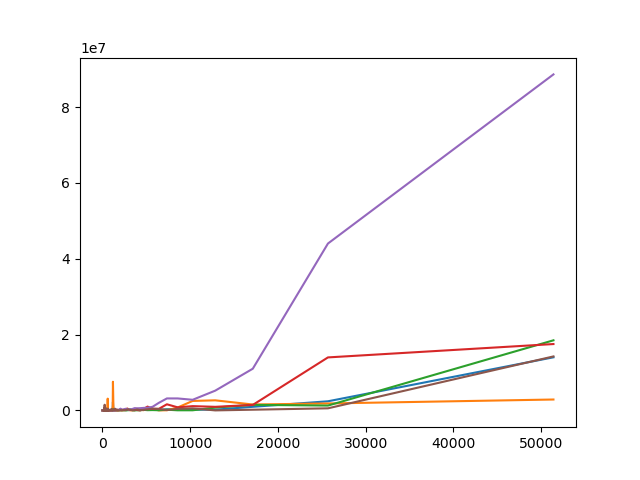

<ipython-input-44-d5fb649296d5>:3: RuntimeWarning: divide by zero encountered in true_divide
  per = 1./f_dho_dun


In [44]:
%matplotlib notebook
fig, ax = plt.subplots()
per = 1./f_dho_dun
ax.plot(per, p_dho_dun)
ax.plot(per, p_fta_dun)
ax.plot(per, p_naa_dun)
ax.plot(per, p_jji_dun)
ax.plot(per, p_src_dun)
ax.plot(per, p_vtx4_dun)


In [53]:
def plot_all(psd):
    fig, ax = plt.subplots()
    ax.plot(per, psd)
    plt.xlim(0, 5000)
    plt.axvline(1200, color="r")
    plt.axvline(600, color="r")
    plt.axvline(300, color="r")   

<IPython.core.display.Javascript object>


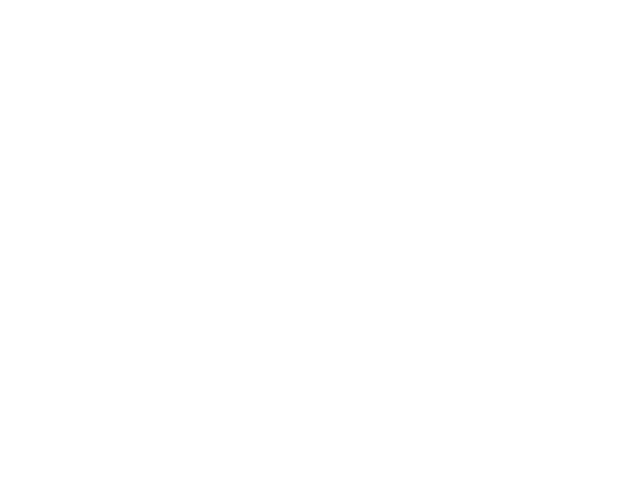

In [60]:
plot_all(p_vtx4_dun)

<IPython.core.display.Javascript object>


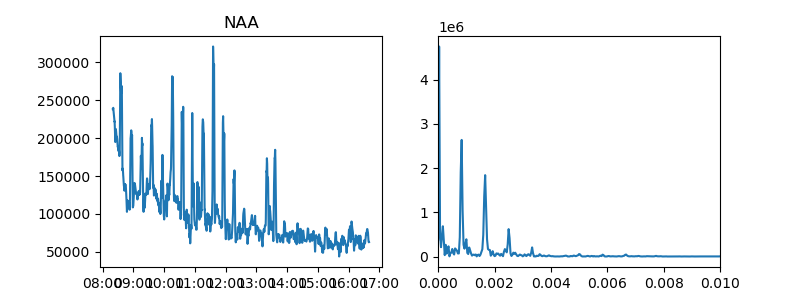

(0.0, 0.01)

In [152]:
# NAA
fig,ax = plt.subplots(1, 2, figsize=(8, 3))
ind1, ind2 = 6000, 12000
ax[0].plot(naa_sid_dun[ind1:ind2])
ax[0].xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
f_naa, p_naa = fourier_ana(np.array(naa_sid_dun[ind1:ind2]), 5)
ax[0].set_title("NAA")
ax[1].plot(f_naa, p_naa)
ax[1].set_xlim(0, 0.01)

<IPython.core.display.Javascript object>


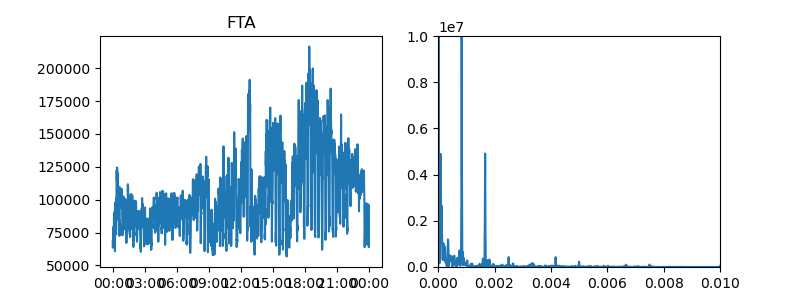

(0.0, 10000000.0)

In [153]:
# FTA
fig,ax = plt.subplots(1, 2, figsize=(8, 3))
ind1, ind2 = 1, -1
ax[0].plot(fta_sid_dun[ind1:ind2])
ax[0].xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
f_fta, p_fta = fourier_ana((np.array(fta_sid_dun[ind1:ind2])), 5)
ax[0].set_title("FTA")
ax[1].plot(f_fta, p_fta)
ax[1].set_xlim(0, 0.01)
ax[1].set_ylim(0, 1e7)
# ax[1].axvline(1./1200, color="r")
# ax[1].axvline(1./600, color="r")


<IPython.core.display.Javascript object>


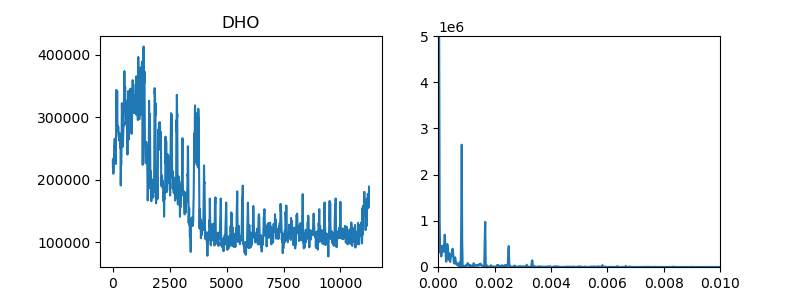

(0.0, 5000000.0)

In [130]:
# DHO
fig,ax = plt.subplots(1, 2, figsize=(8, 3))
ind1, ind2 = 6021, -1
ax[0].plot(np.array(dho_sid_dun[ind1:ind2]))
# ax[0].xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
f_dho, p_dho = fourier_ana(np.array(dho_sid_dun[ind1:ind2]), 5)
ax[0].set_title("DHO")
ax[1].plot(f_dho, p_dho)
ax[1].set_xlim(0, 0.01)
plt.ylim(0, 0.5e7)

In [164]:
import seaborn as sns
sns.set_context("paper", font_scale=1.2)

<IPython.core.display.Javascript object>


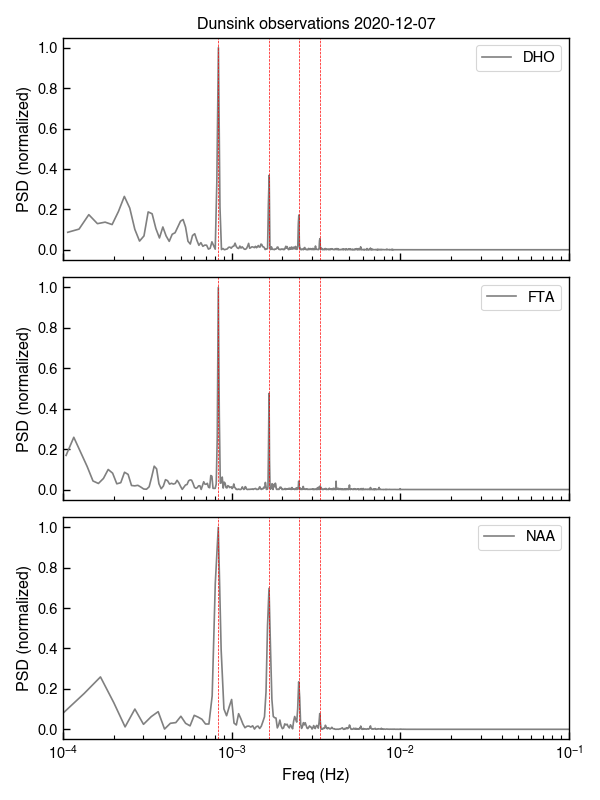

In [192]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(6, 8))
plt.rcParams["font.family"] = "Helvetica"
ax1.set_title("Dunsink observations 2020-12-07")
ax1.plot(f_dho[f_dho>=1e-4], norm(p_dho[f_dho>=1e-4]), label="DHO", color="grey")
ax2.plot(f_fta[f_fta>=1e-4], norm(p_fta[f_fta>=1e-4]), label="FTA", color="grey")
ax3.plot(f_naa[f_naa>=1e-4], norm(p_naa[f_naa>=1e-4]), label="NAA", color="grey")

plt.xscale("log")
for a in (ax1, ax2, ax3):
    a.legend(loc="upper right")
    a.tick_params(which="both", direction="in")
    a.set_ylabel("PSD (normalized)")
    a.axvline(0.00083, color="r", lw=0.5, ls="dashed")
    a.axvline(1./600, color="r", lw=0.5, ls="dashed")
    a.axvline(1./400, color="r", lw=0.5, ls="dashed")
    a.axvline(1./300, color="r", lw=0.5, ls="dashed")
plt.xlim(1e-4, 1e-1)
ax3.set_xlabel("Freq (Hz)")
plt.tight_layout()
plt.savefig("fourier_analysis_dunsink_20201207.png", dpi=200)

In [190]:
[1./1200, 1./600, 1./400, 1./300]

[0.0008333333333333334, 0.0016666666666666668, 0.0025, 0.0033333333333333335]

In [155]:
def norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

<IPython.core.display.Javascript object>


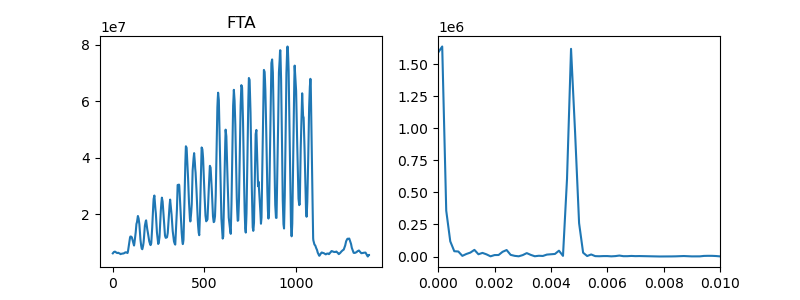

(0.0, 0.01)

In [124]:
# FTA BIR
fig,ax = plt.subplots(1, 2, figsize=(8, 3))
ind1, ind2 = 10600, 12000
ax[0].plot(np.array(fta_sid_bir[ind1:ind2]))
# ax[0].xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
f, p = fourier_ana(np.array(fta_sid_bir[ind1:ind2]), 5)
ax[0].set_title("FTA")
ax[1].plot(f, p)
plt.xlim(0, 0.01)

<IPython.core.display.Javascript object>


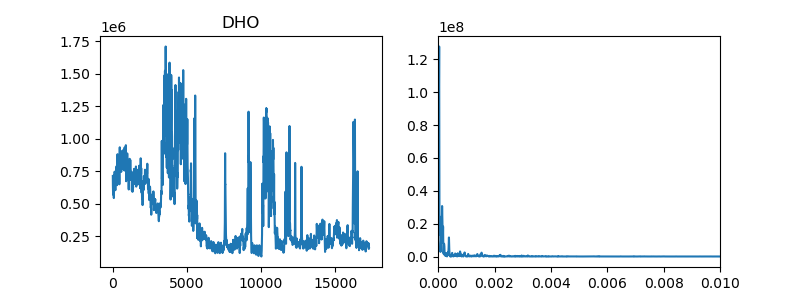

(0.0, 0.01)

In [108]:
# dho BIR
fig,ax = plt.subplots(1, 2, figsize=(8, 3))
ind1, ind2 = 1, -1
ax[0].plot(np.array(dho_sid_bir[ind1:ind2]))
# ax[0].xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
f, p = fourier_ana(np.array(dho_sid_bir[ind1:ind2]), 5)
ax[0].set_title("DHO")
ax[1].plot(f, p)
plt.xlim(0, 0.01)

In [179]:
from astropy import units as u

In [180]:
ff = 0.00083*u.Hz

In [185]:
ff.to(u.uHz)

<Quantity 830. uHz>